<a href="https://colab.research.google.com/github/Mekondjo-EDSA/DSI_Capstone_project/blob/main/Capstone_project_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [18]:
#Load train dataset into dataframe
train = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Train-1542865627584.csv")
train_beneficiary = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Train_Outpatientdata-1542865627584.csv")

In [19]:
#Load test dataset into dataframe 
test = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Test-1542969243754.csv")
test_beneficiary = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("/content/drive/MyDrive/capstone_dataset/Test_Outpatientdata-1542969243754.csv")

In [20]:
train_inpatient['is_admitted'] = 1
train_outpatient['is_admitted'] = 0

In [21]:
train_data = pd.merge(train_inpatient, train_outpatient,
                    left_on = [ idx for idx in train_outpatient.columns if idx in train_inpatient.columns],
                    right_on = [ idx for idx in train_outpatient.columns if idx in train_inpatient.columns],
                    how = 'outer').\
          merge(train_beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [22]:
# Replace values with a binary annotation
train_data = train_data.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                   'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                   'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                   'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'Gender': 2 }, 
                  0)

In [23]:
train_data = train_data.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})

In [24]:
#merging the dataset created in above step with target_data
train_final = pd.merge(train_data, train , how = 'outer', on = 'Provider' )

In [25]:
train_final.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,0,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,1,0,0,0,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,0,1,0,0,0,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,0,1,1,0,0,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,0,27000,2136,450,160,Yes


In [26]:
# adding extra column target, having binary annotation
train_final['target'] = train_final['PotentialFraud']

# 1 representing potential fraud and 0 representing non potential fraud
train_final['target'] = train_final['target'].map({"Yes": 1,"No": 0})
train_final['target'] = train_final['target'].astype('category', copy = False)

In [27]:
train_final.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,target
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,0,1,1,36000,3204,60,70,Yes,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,1,0,0,0,24000,2136,450,200,Yes,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,1,0,0,0,19000,1068,100,20,Yes,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,1,1,0,0,17000,1068,1050,540,Yes,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,0,27000,2136,450,160,Yes,1


No     345415
Yes    212796
Name: PotentialFraud, dtype: int64


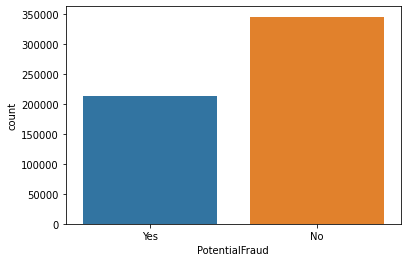

In [28]:
print(train_final.PotentialFraud.value_counts())
sns.countplot(x = 'PotentialFraud', data = train_final)

In [29]:
#Adding a column is_dead  = 1  DOD is given else is_dead = 0 
train_final.loc[train_final['DOD'].isnull(), 'Is_Dead'] = '0'
train_final.loc[train_final['DOD'].notnull(), 'Is_Dead'] = '1'

In [ ]:
#tr_data_final['DOB'] =  pd.to_datetime(tr_data_final['DOB'], format='%Y-%m-%d')  
#tr_data_final['ClaimStartDt'] = pd.to_datetime(tr_data_final['ClaimStartDt'], format='%Y-%m-%d')  

#now = pd.to_datetime('2020-09-01' , format = '%Y-%m-%d')
#tr_data_final['DOB'] = tr_data_final['DOB'].where(tr_data_final['DOB'] < tr_data_final['ClaimStartDt']) 
#tr_data_final['age'] = (tr_data_final['ClaimStartDt'] - tr_data_final['DOB']).astype('<m8[Y]')

In [31]:
#calculating number of days a patient was admitted in the hospital and then removing admission and discharge dates
#outpatients dont get admitted so we keep 0 for them


train_final['AdmissionDt'] = pd.to_datetime(train_final['AdmissionDt'] , format = '%Y-%m-%d')
train_final['DischargeDt'] = pd.to_datetime(train_final['DischargeDt'],format = '%Y-%m-%d')
train_final['Num_admit_days'] = ((train_final['DischargeDt'] - train_final['AdmissionDt']).dt.days)+1
train_final.loc[train_final['is_admitted'] == 0, 'Num_admit_days'] = '0'

train_final = train_final.drop(['DischargeDt'], axis = 1)
train_final = train_final.drop(['AdmissionDt'], axis = 1)

In [34]:
#replace NaN value with 0
train_final.loc[train_final['DeductibleAmtPaid'].isnull(),'DeductibleAmtPaid'] = 0

In [36]:
train_final.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,target,Is_Dead,Num_admit_days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,1,1,36000,3204,60,70,Yes,1,0,7.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,0,0,24000,2136,450,200,Yes,1,0,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,0,0,19000,1068,100,20,Yes,1,0,13.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,...,0,0,17000,1068,1050,540,Yes,1,0,19.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,1,0,27000,2136,450,160,Yes,1,0,5.0


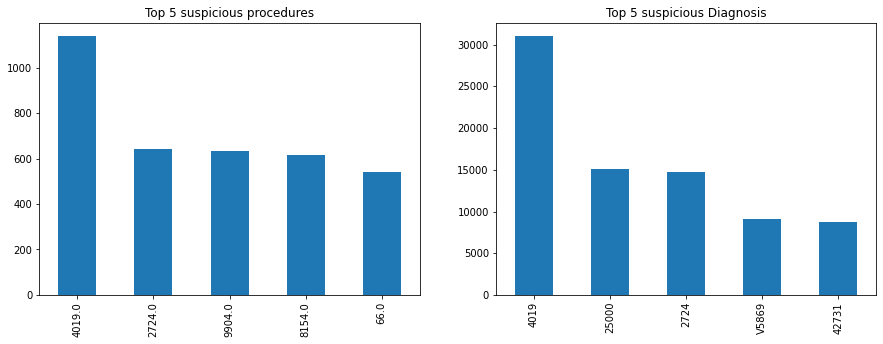

In [38]:
potential_fraud_df =train_final.loc[train_final['PotentialFraud'] == 'Yes']

df1 = pd.DataFrame(columns = ['ProcedureCode'])
df1['ProcedureCode'] = pd.concat([potential_fraud_df["ClmProcedureCode_1"], 
                                           potential_fraud_df["ClmProcedureCode_2"],
                                           potential_fraud_df["ClmProcedureCode_3"],
                                           potential_fraud_df["ClmProcedureCode_4"], 
                                           potential_fraud_df["ClmProcedureCode_5"], 
                                           potential_fraud_df["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

df2 = pd.DataFrame(columns = ['DiagnosisCode'])
df2['DiagnosisCode'] = pd.concat([potential_fraud_df["ClmDiagnosisCode_1"], 
                                           potential_fraud_df["ClmDiagnosisCode_2"], 
                                           potential_fraud_df["ClmDiagnosisCode_3"], 
                                           potential_fraud_df["ClmDiagnosisCode_4"],
                                           potential_fraud_df["ClmDiagnosisCode_5"], 
                                           potential_fraud_df["ClmDiagnosisCode_6"],
                                           potential_fraud_df["ClmDiagnosisCode_7"],
                                           potential_fraud_df["ClmDiagnosisCode_8"],
                                           potential_fraud_df["ClmDiagnosisCode_9"],
                                           potential_fraud_df["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

plt.figure(figsize=(15, 5))
plt.subplot(121)
df1.ProcedureCode.value_counts().head(5).plot(kind = 'bar' , title ='Top 5 suspicious procedures')

plt.subplot(122)
df2.DiagnosisCode.value_counts().head(5).plot(kind = 'bar' , title ='Top 5 suspicious Diagnosis')

In [39]:

Diag_proce_col = ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_10',
                  'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                  'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                  'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1',
                  'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
                  'ClmProcedureCode_5', 'ClmProcedureCode_6']

train_final[Diag_proce_col] = train_final[Diag_proce_col].replace({np.nan:0})
train_final.head(5)



,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,target,Is_Dead,Num_admit_days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,1,1,36000,3204,60,70,Yes,1,0,7.0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,0,...,0,0,24000,2136,450,200,Yes,1,0,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,0,0,19000,1068,100,20,Yes,1,0,13.0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,...,0,0,17000,1068,1050,540,Yes,1,0,19.0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,1,0,27000,2136,450,160,Yes,1,0,5.0


In [40]:
def encoded_cat(dataset, feature_to_encode='',col_list=[]):
    """This function returns top 5 cat column useful in determining potential fraud"""
    outer_list =[]
    for col in col_list:
        list_1 = list()
        
        for item in list(dataset[col]):
            if str(item) == str(feature_to_encode):
                list_1.append(1)
            else:
                list_1.append(0)
        
        outer_list.append(list_1)
    
    li_sum = np.array([0]*558211)
    
    for i in range(0,len(outer_list)):
        li1 = np.array(outer_list[i])
        li_sum = li_sum + li1
        
    return li_sum


procedure_col = ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']
   
diagnosis_col = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']


#top 5 procedure
# 4019.0, 2724.0, 9904.0, 8154.0, 66.0
train_final['pr_4019'] = encoded_cat(train_final,'4019.0',procedure_col)
train_final['pr_2724'] = encoded_cat(train_final,'2724.0',procedure_col)
train_final['pr_9904'] = encoded_cat(train_final,'9904.0',procedure_col)
train_final['pr_8154'] = encoded_cat(train_final,'8154.0',procedure_col)
train_final['pr_66'] =   encoded_cat(train_final,'66.0',procedure_col)

#top 5 diagnain
#4019,25000,2724,V5869,42731
train_final['di_4019'] = encoded_cat(train_final,'4019',diagnosis_col)
train_final['di_25000'] = encoded_cat(train_final,'25000',diagnosis_col)
train_final['di_2724'] = encoded_cat(train_final,'2724',diagnosis_col)
train_final['di_V5869'] = encoded_cat(train_final,'V5869',diagnosis_col)
train_final['di_42731'] =   encoded_cat(train_final,'42731',diagnosis_col)

In [41]:
train_final.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,pr_4019,pr_2724,pr_9904,pr_8154,pr_66,di_4019,di_25000,di_2724,di_V5869,di_42731
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,0,0,0,0,0,1,0,1,0,0
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,...,0,0,0,0,0,0,0,0,0,0
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,...,0,0,0,0,0,1,0,0,0,0
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,...,0,0,0,1,0,1,0,0,0,0


In [42]:
for i in Diag_proce_col:
    train_final[i][train_final[i]!=0]= 1

train_final[Diag_proce_col].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,1,1,0,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,1,1,1,1,1,1,1,1,1.0,1.0,0.0,0.0,0.0,0.0
3,1,1,0,1,1,1,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,1,1,1,1,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#adding column total_num_diagnosis

train_final['total_num_diag'] = 0 
for col in diagnosis_col :
    train_final['total_num_diag']  = train_final['total_num_diag'] + train_final[col]

In [44]:
train_final['total_num_proce'] = 0 
for col in procedure_col :
    train_final['total_num_proce']  = train_final['total_num_proce'] + train_final[col]

In [46]:
train_final['total_num_diag'] =  train_final['total_num_diag'].astype(float)
train_final['total_num_proce'] =  train_final['total_num_proce'].astype(float)

In [47]:
len(list(train_final['BeneID'].unique()))

138556

In [48]:
len(list(train_final['ClaimID'].unique()))

558211

In [49]:
val_counts_ = train_final['BeneID'].value_counts()
train_final_beneid_df = val_counts_.to_frame() #store this information in dataframe

train_final_beneid_df.columns = ['count']
train_final_beneid_df['BeneID'] = train_final_beneid_df.index
train_final_beneid_df

,count,BeneID
BENE42721,29,BENE42721
BENE59303,29,BENE59303
BENE118316,29,BENE118316
BENE80977,28,BENE80977
BENE36330,28,BENE36330
...,...,...
BENE71134,1,BENE71134
BENE118154,1,BENE118154
BENE100290,1,BENE100290
BENE137665,1,BENE137665


In [51]:
from tqdm import tqdm

total_amount_list = []
mean_amount_list = []

for benid in tqdm(train_final_beneid_df['BeneID']):
    
    total_amount = train_final.loc[train_final['BeneID'] == benid,'InscClaimAmtReimbursed'].sum() 
    mean_amount = total_amount / (train_final_beneid_df.loc[train_final_beneid_df['BeneID'] == benid,'count'])
    
    total_amount_list.append(total_amount)
    mean_amount_list.append(mean_amount)
    

100%|██████████| 138556/138556 [2:26:02<00:00, 15.81it/s]


In [52]:
mean_list = []
for item in tqdm(mean_amount_list):
    mean_list.append(item[0])

100%|██████████| 138556/138556 [00:01<00:00, 89195.00it/s]


In [53]:
train_final_beneid_df['mean_InscClaimAmtReimbursed']= mean_list
train_final_beneid_df['total_InscClaimAmtReimbursed']= total_amount_list
train_final_beneid_df

,count,BeneID,mean_InscClaimAmtReimbursed,total_InscClaimAmtReimbursed
BENE42721,29,BENE42721,1217.586207,35310
BENE59303,29,BENE59303,1175.862069,34100
BENE118316,29,BENE118316,1481.034483,42950
BENE80977,28,BENE80977,2242.142857,62780
BENE36330,28,BENE36330,2181.785714,61090
...,...,...,...,...
BENE71134,1,BENE71134,10.000000,10
BENE118154,1,BENE118154,8000.000000,8000
BENE100290,1,BENE100290,19000.000000,19000
BENE137665,1,BENE137665,50.000000,50


In [54]:
train_final_beneid_df.to_csv('train_final_beneid_df.csv',index= False)

In [1]:


import pickle

with open('total_amount_list.pkl', 'wb') as f:
    pickle.dump(total_amount_list, f)
    
with open('mean_amount_list.pkl', 'wb') as f:
    pickle.dump(mean_amount_list, f)



NameError: ignored